In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.integrate as integrate
from tqdm import tqdm

#PARTE 1

In [ ]:
import numpy as np
#22
lis=[]
count=0
for i in range(11):
  for j in range(11):
    for k in range(11):
      if (i+j+k) == 10:
        count+=1
        lis.append([i,j,k])
count

66

In [ ]:
#23
lis=[]
count=0
for i in range(4):
  for j in range(4):
    for k in range(4):
      if (i+j+k) == 4:
        count+=1
        lis.append([i,j,k])
count

12

#PARTE 2




0.0


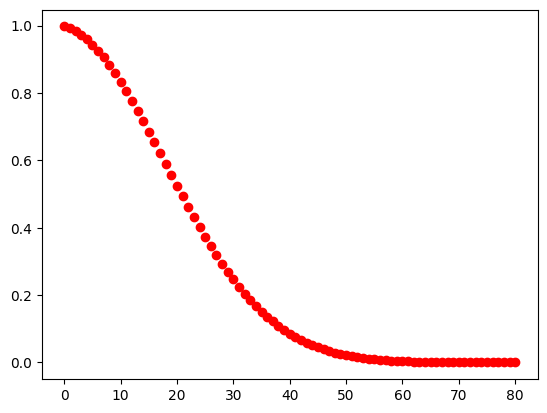

In [ ]:
#4
probability=1
for i in range(365):
  probability*=(365-(i+1))/365  
print(probability)

chart=[]

probabilitty=1
probabilities=[]
n=[]
for i in range(81):
  probabilitty*=(365-(i+1))/365
  probabilities.append([probabilitty])
  n.append([i])

plt.scatter(n,probabilities,color="r")




minima probabilidad
0.04999999999999999
maxima probabilidad
0.45


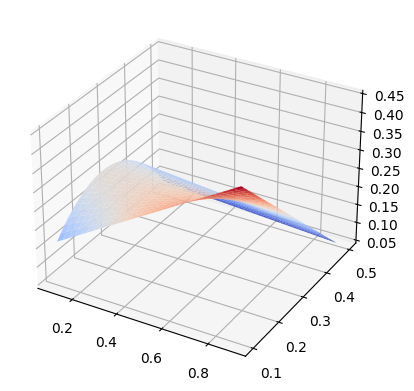

In [ ]:
#9
p1_values = np.linspace(0.1, 0.9, 30)
p2_values = np.linspace(0.1, 0.5, 30)
probabilities = np.zeros((len(p1_values), len(p2_values)))
for i, p1 in enumerate(p1_values):
    for j, p2 in enumerate(p2_values):
        probability = p1 * (1 - p2) * (1 - p1) + (1 - p1) * p2 * (1 - p1)
        probabilities[i, j] = probability

minimum_probability = np.min(probabilities)
print("minima probabilidad")
print(minimum_probability)

minimum_probability = np.max(probabilities)
print("maxima probabilidad")
print(minimum_probability)

p1_mesh, p2_mesh = np.meshgrid(p1_values, p2_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(p1_mesh, p2_mesh, probabilities, cmap='coolwarm')


plt.show()




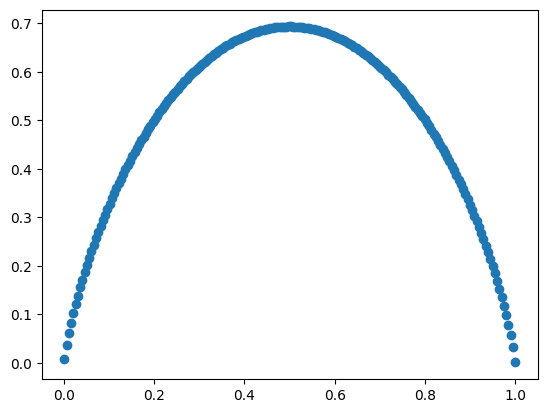

In [ ]:
#12
#D
def S(x):
  return -(x*np.log(x)+(1-x)*np.log(1-x))

x=np.linspace(0.001,0.9999,200)
Entropy=S(x)
plt.scatter(x,Entropy)

#PARTE 3

In [ ]:
#3
def calcular_valor_esperado(num_total_microchips, num_defectuosos, num_compra):
    valor_esperado = 0
    dosmal = math.comb(num_defectuosos, num_compra)
    mc_esperado2=2
    unmal = math.comb(num_defectuosos,num_compra-1)*math.comb(num_total_microchips-num_defectuosos,num_compra-1)
    mc_esperado1=1
    ninguno= math.comb(num_total_microchips - num_defectuosos, num_compra)
    mc_esperado0=0
    Ptotal=unmal+dosmal+ninguno
    total_combinaciones = math.comb(num_total_microchips, num_compra)

    valor_esperado=(mc_esperado2*dosmal/total_combinaciones)+(mc_esperado1*unmal/total_combinaciones)+(mc_esperado0*ninguno/total_combinaciones)

    return valor_esperado

valor_esperado = calcular_valor_esperado(10, 3, 2)
valor_esperado

0.6


4.
a) Se tiene que hay (8,4) formas de tomar 4 partículas elementales de las 8 totales. Además, se tiene que hay (3,x) formas de elegir x electrones, para los protones (2,y) y por último el resto de partículas que se puedan escoger (neutrones), osea (3, 4-x-y).

  Se operan todas las combinaciones posibles y se divide entre el total de combinaciones.

  f(x,y) = (3,x)(2,y)(3,4-x-y) / (8,4)

In [ ]:
def combinaciones(x,y):
  return (np.math.comb(3,x)*np.math.comb(2,y)*np.math.comb(3,4-x-y))/np.math.comb(8,4)

P=np.zeros((4,3))
for i in range(4):
  for j in range(3):

    if i+j<=4:
      P[i,j]=combinaciones(i,j)
      

#b
g_x=np.sum(P,axis=1)
h_y=np.sum(P,axis=0)
print(g_x,h_y)
#c
vece=([0,1,2,3])
Ee=(g_x)@vece
print(Ee)
#d
vecp=([0,1,2])
Ep=(h_y)@vecp
print(Ep)
#e
E_xy=0
for i in range(4):
  for j in range(3):
    E_xy+=i*j*P[i,j]
cov1=E_xy-Ee*Ep
print(cov1)
#f
cov2=0
for i in range(4):
  for j in range(3):
    cov2+=(i-Ee)*(j-Ep)*P[i,j]
print(cov2)
#g: Las variables tienen un 99% de probabilidad de ser independientes


[0.07142857 0.42857143 0.42857143 0.07142857] [0.21428571 0.57142857 0.21428571]
1.4999999999999998
1.0
-0.2142857142857142
-0.2142857142857143


#PARTE 4

In [ ]:
#1
x=sym.Symbol('x')
y=sym.Symbol('y')
def Function(x,y):
    f=(2/3)*(x+(2*y))
    return f
f1=Function (x,y)

#b
g=sym.integrate(f1,(y,0,1))
h=sym.integrate(f1,(x,0,1))

#c
Esperadox=sym.integrate(g*x,(x,0,1))

#d
Esperadoy=sym.integrate(h*y,(y,0,1))

#e
E_xy=sym.integrate(f1*x*y,(x,0,1),(y,0,1))
covarianza1=E_xy-Esperadox*Esperadoy

#f
covarianza2=sym.integrate((x-Esperadox)*(y-Esperadoy)*f1,(x,0,1),(y,0,1))


print(g,h)
print(h)
print(Esperadox,Esperadoy,covarianza1,covarianza2)

0.666666666666667*x + 0.666666666666667 1.33333333333333*y + 0.333333333333333
1.33333333333333*y + 0.333333333333333
0.555555555555556 0.611111111111111 -0.00617283950617281 -0.00617283950617284


In [ ]:
#4
xx = sym.Symbol('x',real=True)

f = sym.exp(-xx)
g = sym.exp(2*xx/3)
h = g*f
integral = sym.integrate(h,(xx,0,np.inf))
print("valor esperado", integral)

valor esperado 3


#PARTE 5

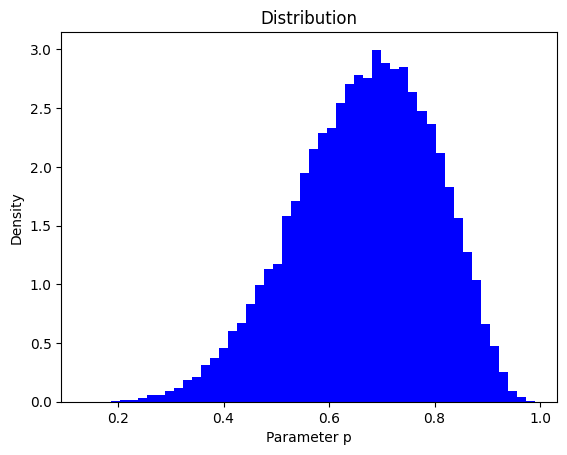

In [48]:
#1
import numpy as np
import matplotlib.pyplot as plt

def prior(p):
    return 1 if 0 <= p <= 1 else 0

def likelihood(p, r, n):
    return p**r * (1-p)**(n-r)

def posterior(p, r, n):
    return likelihood(p, r, n) * prior(p)

def metropolis(x0, posterior, n_steps=int(1e5), delta=0.4):  
    x = np.zeros(n_steps)
    x[0] = x0
    for i in range(1, n_steps):
        p0 = posterior(x[i-1], r, n)
        xf = x[i-1] + delta * (2 * np.random.rand() - 1)
        p1 = posterior(xf, r, n)
        alpha = min(1, p1 / p0)
        if np.random.rand() < alpha:
            x[i] = xf
        else:
            x[i] = x[i-1]
    return x[1000:]

r = 7
n = 10
init_params = 0.2
mcmc_samples = metropolis(init_params, posterior)

plt.hist(mcmc_samples, density=True, bins=50, color="b")
plt.xlabel("Parameter p")
plt.ylabel("Density")
plt.title("Distribution")
plt.show()